In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

%matplotlib inline

In [2]:
train = pd.read_csv('train_ajEneEa.csv')

In [3]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
train=train.drop('id',axis=1)

In [5]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## 1.Dummy variables for gender

In [6]:
train['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [7]:
gender_dummies = pd.get_dummies(train['gender'],drop_first=True)
gender_dummies.columns=['Male','Other_gender']
train = pd.concat([train,gender_dummies],axis=1)

train=train.drop('gender',axis=1)

In [8]:
train

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Other_gender
0,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,1,0
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1,0
2,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0,0
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0,0
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0,0
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0,0
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0,0
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1,0


## 2. Hypertension 

In [9]:
train['hypertension'].value_counts()

0    39339
1     4061
Name: hypertension, dtype: int64

### 3. heart_disease

In [10]:
train['heart_disease'].value_counts()

0    41338
1     2062
Name: heart_disease, dtype: int64

## 4.ever_married

In [11]:
train['ever_married'].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [12]:
train['ever_married']=train['ever_married'].map({'Yes':int(2),'No':int(1)})

In [13]:
train.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Other_gender
0,3.0,0,0,1,children,Rural,95.12,18.0,NaN,0,1,0
1,58.0,1,0,2,Private,Urban,87.96,39.2,never smoked,0,1,0
2,8.0,0,0,1,Private,Urban,110.89,17.6,NaN,0,0,0
3,70.0,0,0,2,Private,Rural,69.04,35.9,formerly smoked,0,0,0
4,14.0,0,0,1,Never_worked,Rural,161.28,19.1,NaN,0,1,0


## 5.work_type

In [14]:
train['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [15]:
train['work_type']=np.where(train['work_type']=='children',"Never_worked",train['work_type'])

In [16]:
train['work_type'].value_counts()

Private          24834
Self-employed     6793
Never_worked      6333
Govt_job          5440
Name: work_type, dtype: int64

In [17]:
train['work_type'].unique()

array(['Never_worked', 'Private', 'Self-employed', 'Govt_job'],
      dtype=object)

In [18]:
train['work_type']=train['work_type'].map({'Never_worked':int(1), 'Private':int(3), 'Self-employed':int(4), 'Govt_job':int(2)})

## 6. Residence type 

In [19]:
train['Residence_type'].value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

In [20]:
residence_dummies = pd.get_dummies(train['Residence_type'],drop_first=True)
residence_dummies.columns=['Residence']
train=pd.concat([train,residence_dummies],axis=1)
train.drop('Residence_type',axis=1,inplace=True)

In [21]:
train.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Other_gender,Residence
0,3.0,0,0,1,1,95.12,18.0,NaN,0,1,0,0
1,58.0,1,0,2,3,87.96,39.2,never smoked,0,1,0,1
2,8.0,0,0,1,3,110.89,17.6,NaN,0,0,0,1
3,70.0,0,0,2,3,69.04,35.9,formerly smoked,0,0,0,0
4,14.0,0,0,1,1,161.28,19.1,NaN,0,1,0,0


## 7. Average glucose Level

In [22]:
train['log_avg_glucose_level'] = np.log(train['avg_glucose_level'])

## 8. Age

In [23]:
train['age']

0         3.0
1        58.0
2         8.0
3        70.0
4        14.0
         ... 
43395    10.0
43396    56.0
43397    82.0
43398    40.0
43399    82.0
Name: age, Length: 43400, dtype: float64

## 9. bmi # there are some missing values in bmi

In [25]:
train.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Other_gender,Residence,log_avg_glucose_level
0,3.0,0,0,1,1,95.12,18.0,NaN,0,1,0,0,4.555139
1,58.0,1,0,2,3,87.96,39.2,never smoked,0,1,0,1,4.476882
2,8.0,0,0,1,3,110.89,17.6,NaN,0,0,0,1,4.708539
3,70.0,0,0,2,3,69.04,35.9,formerly smoked,0,0,0,0,4.234686
4,14.0,0,0,1,1,161.28,19.1,NaN,0,1,0,0,5.083142


In [39]:
train = train.dropna(subset=['bmi'],axis=0)

In [40]:
train.isnull().sum()

age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
avg_glucose_level            0
bmi                          0
smoking_status           12866
stroke                       0
Male                         0
Other_gender                 0
Residence                    0
log_avg_glucose_level        0
dtype: int64

## 10. Smoking status

In [43]:
train['smoking_status'] = np.where(train['smoking_status'].isnull()==True,"Unknown",train['smoking_status'])

In [44]:
train.isnull().sum()

age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
avg_glucose_level        0
bmi                      0
smoking_status           0
stroke                   0
Male                     0
Other_gender             0
Residence                0
log_avg_glucose_level    0
dtype: int64

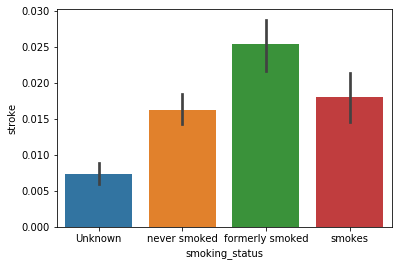

In [45]:
sns.barplot(x='smoking_status',y='stroke',data=train)

In [46]:
train['smoking_status'].value_counts()

never smoked       15747
Unknown            12866
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [47]:
smoke_dummies = pd.get_dummies(train['smoking_status'],drop_first=True)

train = pd.concat([train,smoke_dummies],axis=1)

train=train.drop('smoking_status',axis=1)

In [49]:
train.isnull().sum()

age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
avg_glucose_level        0
bmi                      0
stroke                   0
Male                     0
Other_gender             0
Residence                0
log_avg_glucose_level    0
formerly smoked          0
never smoked             0
smokes                   0
dtype: int64

In [50]:
train.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke,Male,Other_gender,Residence,log_avg_glucose_level,formerly smoked,never smoked,smokes
0,3.0,0,0,1,1,95.12,18.0,0,1,0,0,4.555139,0,0,0
1,58.0,1,0,2,3,87.96,39.2,0,1,0,1,4.476882,0,1,0
2,8.0,0,0,1,3,110.89,17.6,0,0,0,1,4.708539,0,0,0
3,70.0,0,0,2,3,69.04,35.9,0,0,0,0,4.234686,1,0,0
4,14.0,0,0,1,1,161.28,19.1,0,1,0,0,5.083142,0,0,0


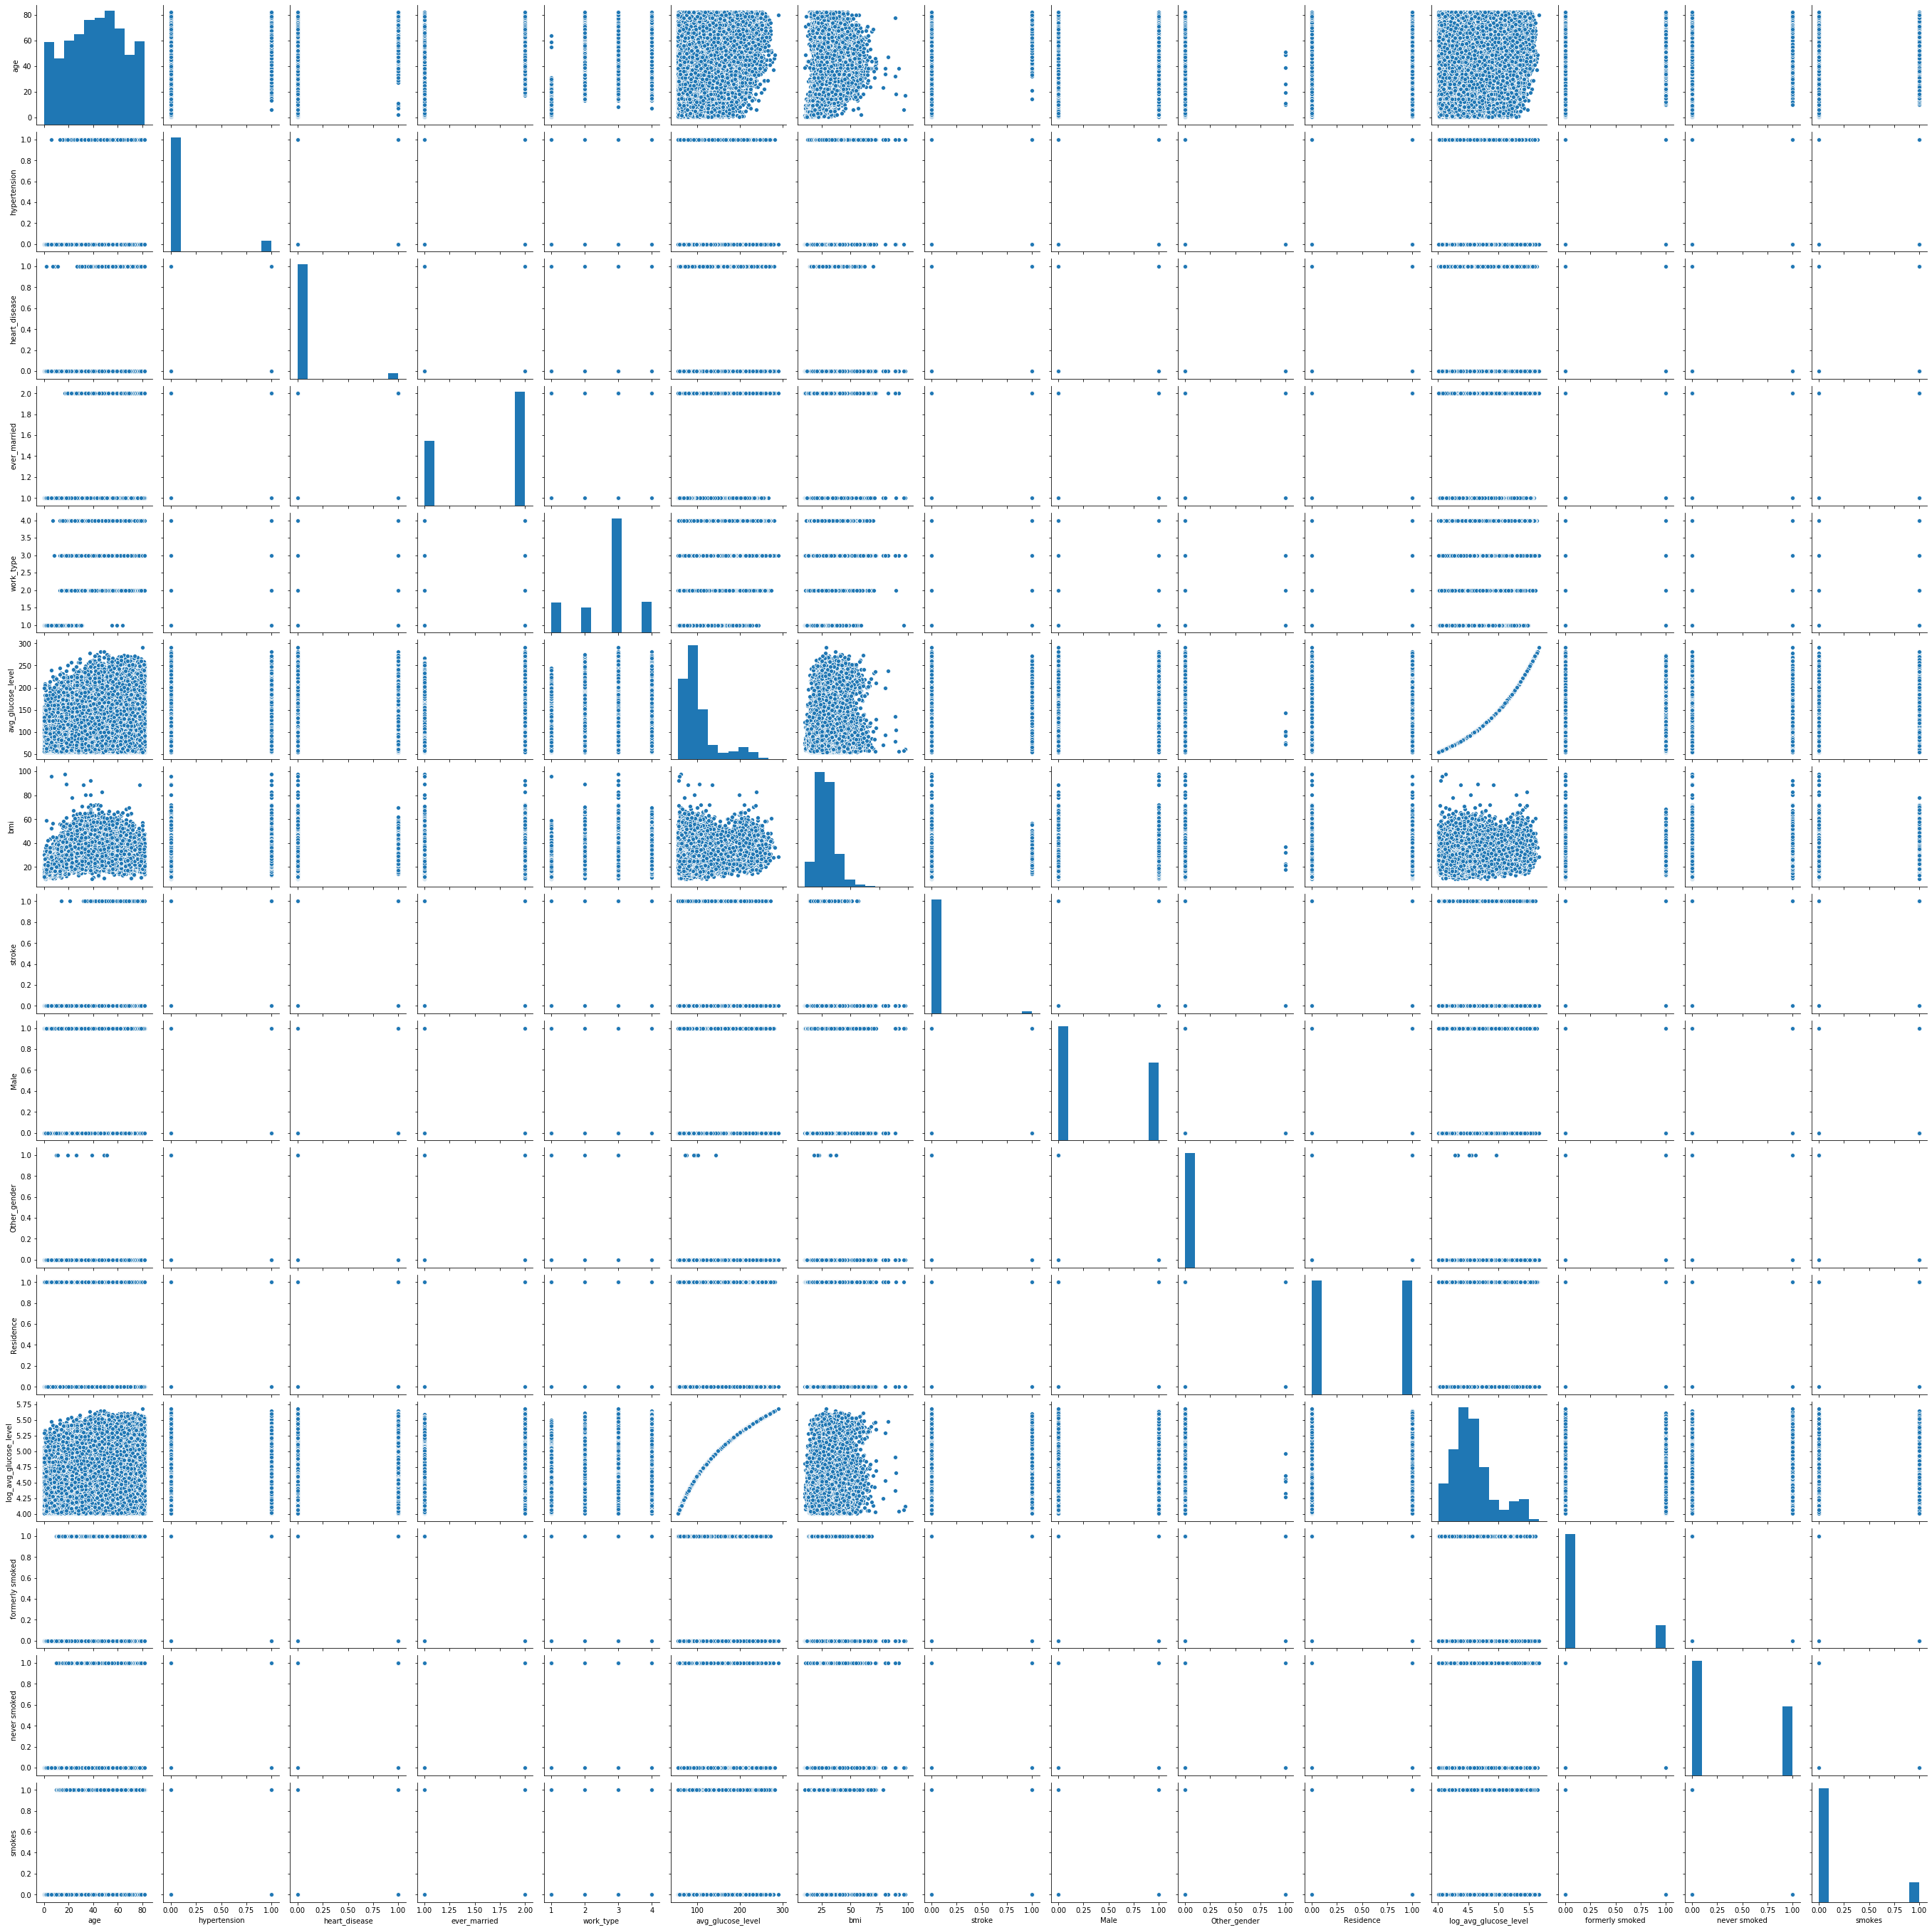

In [51]:
sns.pairplot(train)

In [52]:
train.to_csv('Featured_Engineering.csv')